In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'anhminhnguynon'
os.environ['KAGGLE_KEY'] = 'e05f63720d7c932ea718de8cdaf86e40'
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:22<00:00, 29.3MB/s]
100% 812M/812M [00:22<00:00, 38.2MB/s]


In [2]:
from zipfile import ZipFile

file_name = '/content/dogs-vs-cats.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
from zipfile import ZipFile

file_name = '/content/train.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
from zipfile import ZipFile

file_name = '/content/test1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
train_path = os.getcwd()+'/train'
test_path = os.getcwd()+'/test1'

In [6]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [7]:
data = []

In [8]:
import cv2
import matplotlib.pyplot as plt

In [9]:
for f_name in os.listdir(train_path):
    img_path = train_path + '/' + f_name
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, Image_Size)
    if f_name[0:3]=='cat':
        label = 0
        data.append([img_resized, label])
    else:
        label = 1
        data.append([img_resized, label])

In [10]:
import random

random.shuffle(data)

In [11]:
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [12]:
import numpy as np

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X,y, validation_split=0.1, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
2250/2250 [==============================] - 18s 8ms/step - loss: 0.5934 - accuracy: 0.7023 - val_loss: 0.5788 - val_accuracy: 0.7376
Epoch 2/15
2250/2250 [==============================] - 17s 8ms/step - loss: 0.4590 - accuracy: 0.7820 - val_loss: 0.5783 - val_accuracy: 0.7232
Epoch 3/15
2250/2250 [==============================] - 17s 7ms/step - loss: 0.4049 - accuracy: 0.8157 - val_loss: 0.4392 - val_accuracy: 0.8012
Epoch 4/15
2250/2250 [==============================] - 17s 7ms/step - loss: 0.3592 - accuracy: 0.8424 - val_loss: 0.4266 - val_accuracy: 0.8068
Epoch 5/15
2250/2250 [==============================] - 17s 8ms/step - loss: 0.3179 - accuracy: 0.8610 - val_loss: 0.3837 - val_accuracy: 0.8248
Epoch 6/15
2250/2250 [==============================] - 16s 7ms/step - loss: 0.2810 - accuracy: 0.8807 - val_loss: 0.4553 - val_accuracy: 0.8132
Epoch 7/15
2250/2250 [==============================] - 17s 8ms/step - loss: 0.2488 - accuracy: 0.8961 - val_loss: 0.3288 - val_ac

In [24]:
model.save('dogs_and_cats.h5')

In [36]:
X_test = []
for f_name in os.listdir(test_path):
    img_path = test_path + '/' + f_name
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, Image_Size)
    X_test.append(img_resized)

In [38]:
X_test = np.array(X_test)

In [39]:
y_predicted = model.predict(X_test)

391/391 [==============================] - 2s 5ms/step


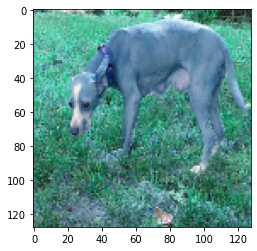

In [50]:
plt.imshow(X_test[100])

In [51]:
y_predicted[100]

array([0.9911413], dtype=float32)

In [2]:
import keras

In [4]:
model = keras.models.load_model('dogs_and_cats.h5')

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                      